In [1]:
# Polynomial Regression
# Gerekli Kütüphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('maas.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [3]:
# Veri setimizi eğitim ve test seti olarak 2 ye ayırmıyoruz. Bunun 2 nedeni var.
#1.si veri setimizde yeteri kadar bilgi yok. Totalde 10 satırdan oluşuyor.
#2.si ise accurate (doğru) tahmin yapmak istememiz.
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [4]:
# Polynomial regression ile karşılaşma yapmak için modelizimiz Linear regression ile eğitiyoruz.
from sklearn.linear_model import LinearRegression
linear= LinearRegression()
linear.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
# Polynomial Regression ile modelimizi eğitme 
from sklearn.preprocessing import PolynomialFeatures
''' polynomial adında PolynomialFeatures class'ından bir nesne yaratıp derecesini 4 olarak aldık. Varsayılan değeri 2'dir.
    Bu değeri değiştirip grafiğini çizerek nasıl bir curve meydana geldiğini görebiliriz. 
    Fakat değeri çok artırırsak overfitting meydana gelir. Model, training sette elde ettiği sonuçları ezberler.
    Modelin kompleksliği artar.'''
polynomial = PolynomialFeatures(degree = 4)
X_poly = polynomial.fit_transform(X)
polynomial.fit(X_poly, y)
linear_2 = LinearRegression()
linear_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# OLS class' ını kullanarak R^2 değerini bulma 
import statsmodels.formula.api as sm
regressor_OLS = sm.OLS(endog = y, exog = X_poly).fit()
print("R^2: ",regressor_OLS.rsquared)
print("Adj. R^2: ",regressor_OLS.rsquared_adj)

R^2:  0.997392289171
Adj. R^2:  0.995306120507


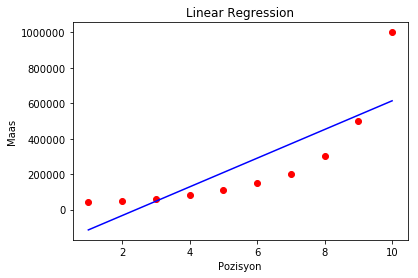

In [7]:
# Linear Regression sonuçlarını görselleştirme 
plt.scatter(X, y, color = 'red')
plt.plot(X, linear.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Pozisyon')
plt.ylabel('Maas')
plt.show()

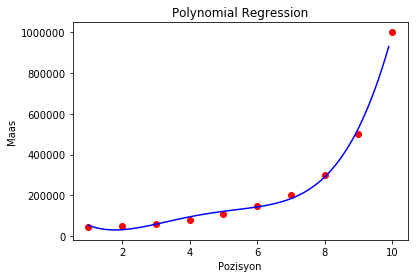

In [8]:
# Polynomial Regression sonuçlarını görselleştirme 
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, linear_2.predict(polynomial.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Pozisyon')
plt.ylabel('Maas')
plt.show()


In [9]:
# Linear Regression modeli ile pozisyonu 7 olan kişinin maasını hesaplama
linear.predict(7)

array([ 370818.18181818])

In [10]:
# Polynomial Regression modeli ile pozisyonu 7 olan kişinin maasını hesaplama
linear_2.predict(polynomial.fit_transform(7))

array([ 184003.49650353])